# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/mogady/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

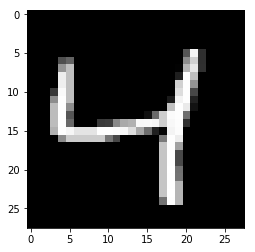

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
shape=mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,[None,shape],name='input0')
targets_ = tf.placeholder(tf.float32,[None,shape],name='target0')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,shape,activation=None)
# Sigmoid output from logits
decoded =tf.nn.sigmoid(logits,name='output1')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.0001).minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6943
Epoch: 1/20... Training loss: 0.6940
Epoch: 1/20... Training loss: 0.6937
Epoch: 1/20... Training loss: 0.6934
Epoch: 1/20... Training loss: 0.6931
Epoch: 1/20... Training loss: 0.6928
Epoch: 1/20... Training loss: 0.6926
Epoch: 1/20... Training loss: 0.6924
Epoch: 1/20... Training loss: 0.6922
Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6915
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6908
Epoch: 1/20... Training loss: 0.6906
Epoch: 1/20... Training loss: 0.6903
Epoch: 1/20... Training loss: 0.6899
Epoch: 1/20... Training loss: 0.6898
Epoch: 1/20... Training loss: 0.6894
Epoch: 1/20... Training loss: 0.6890
Epoch: 1/20... Training loss: 0.6886
Epoch: 1/20... Training loss: 0.6883
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6879
Epoch: 1/20... Training loss: 0.6873
Epoch: 1/20... Training loss: 0.6870
Epoch: 1/20... Training loss: 0.6865
E

Epoch: 1/20... Training loss: 0.3118
Epoch: 2/20... Training loss: 0.3046
Epoch: 2/20... Training loss: 0.3090
Epoch: 2/20... Training loss: 0.3061
Epoch: 2/20... Training loss: 0.3033
Epoch: 2/20... Training loss: 0.3034
Epoch: 2/20... Training loss: 0.3077
Epoch: 2/20... Training loss: 0.3007
Epoch: 2/20... Training loss: 0.3003
Epoch: 2/20... Training loss: 0.3023
Epoch: 2/20... Training loss: 0.3062
Epoch: 2/20... Training loss: 0.3018
Epoch: 2/20... Training loss: 0.3055
Epoch: 2/20... Training loss: 0.3070
Epoch: 2/20... Training loss: 0.3040
Epoch: 2/20... Training loss: 0.3037
Epoch: 2/20... Training loss: 0.3016
Epoch: 2/20... Training loss: 0.3067
Epoch: 2/20... Training loss: 0.3037
Epoch: 2/20... Training loss: 0.3023
Epoch: 2/20... Training loss: 0.2980
Epoch: 2/20... Training loss: 0.3068
Epoch: 2/20... Training loss: 0.3014
Epoch: 2/20... Training loss: 0.3037
Epoch: 2/20... Training loss: 0.3025
Epoch: 2/20... Training loss: 0.2986
Epoch: 2/20... Training loss: 0.3034
E

Epoch: 3/20... Training loss: 0.2724
Epoch: 3/20... Training loss: 0.2763
Epoch: 3/20... Training loss: 0.2721
Epoch: 3/20... Training loss: 0.2807
Epoch: 3/20... Training loss: 0.2741
Epoch: 3/20... Training loss: 0.2773
Epoch: 3/20... Training loss: 0.2772
Epoch: 3/20... Training loss: 0.2750
Epoch: 3/20... Training loss: 0.2744
Epoch: 3/20... Training loss: 0.2762
Epoch: 3/20... Training loss: 0.2712
Epoch: 3/20... Training loss: 0.2649
Epoch: 3/20... Training loss: 0.2744
Epoch: 3/20... Training loss: 0.2770
Epoch: 3/20... Training loss: 0.2670
Epoch: 3/20... Training loss: 0.2749
Epoch: 3/20... Training loss: 0.2696
Epoch: 3/20... Training loss: 0.2668
Epoch: 3/20... Training loss: 0.2727
Epoch: 3/20... Training loss: 0.2709
Epoch: 3/20... Training loss: 0.2677
Epoch: 3/20... Training loss: 0.2713
Epoch: 3/20... Training loss: 0.2716
Epoch: 3/20... Training loss: 0.2778
Epoch: 3/20... Training loss: 0.2729
Epoch: 3/20... Training loss: 0.2702
Epoch: 3/20... Training loss: 0.2721
E

Epoch: 3/20... Training loss: 0.2599
Epoch: 3/20... Training loss: 0.2510
Epoch: 3/20... Training loss: 0.2497
Epoch: 3/20... Training loss: 0.2513
Epoch: 3/20... Training loss: 0.2557
Epoch: 3/20... Training loss: 0.2507
Epoch: 3/20... Training loss: 0.2506
Epoch: 3/20... Training loss: 0.2518
Epoch: 3/20... Training loss: 0.2523
Epoch: 3/20... Training loss: 0.2598
Epoch: 3/20... Training loss: 0.2513
Epoch: 3/20... Training loss: 0.2494
Epoch: 3/20... Training loss: 0.2584
Epoch: 3/20... Training loss: 0.2564
Epoch: 3/20... Training loss: 0.2581
Epoch: 3/20... Training loss: 0.2524
Epoch: 3/20... Training loss: 0.2565
Epoch: 3/20... Training loss: 0.2568
Epoch: 3/20... Training loss: 0.2547
Epoch: 3/20... Training loss: 0.2523
Epoch: 3/20... Training loss: 0.2627
Epoch: 3/20... Training loss: 0.2539
Epoch: 3/20... Training loss: 0.2565
Epoch: 3/20... Training loss: 0.2532
Epoch: 3/20... Training loss: 0.2531
Epoch: 3/20... Training loss: 0.2523
Epoch: 3/20... Training loss: 0.2546
E

Epoch: 4/20... Training loss: 0.2319
Epoch: 4/20... Training loss: 0.2327
Epoch: 4/20... Training loss: 0.2339
Epoch: 4/20... Training loss: 0.2377
Epoch: 4/20... Training loss: 0.2378
Epoch: 4/20... Training loss: 0.2298
Epoch: 4/20... Training loss: 0.2398
Epoch: 4/20... Training loss: 0.2398
Epoch: 4/20... Training loss: 0.2349
Epoch: 4/20... Training loss: 0.2400
Epoch: 4/20... Training loss: 0.2340
Epoch: 4/20... Training loss: 0.2352
Epoch: 4/20... Training loss: 0.2350
Epoch: 4/20... Training loss: 0.2338
Epoch: 4/20... Training loss: 0.2400
Epoch: 4/20... Training loss: 0.2357
Epoch: 4/20... Training loss: 0.2350
Epoch: 4/20... Training loss: 0.2356
Epoch: 4/20... Training loss: 0.2298
Epoch: 4/20... Training loss: 0.2335
Epoch: 4/20... Training loss: 0.2341
Epoch: 4/20... Training loss: 0.2354
Epoch: 4/20... Training loss: 0.2328
Epoch: 4/20... Training loss: 0.2314
Epoch: 4/20... Training loss: 0.2352
Epoch: 4/20... Training loss: 0.2345
Epoch: 4/20... Training loss: 0.2339
E

Epoch: 5/20... Training loss: 0.2148
Epoch: 5/20... Training loss: 0.2208
Epoch: 5/20... Training loss: 0.2140
Epoch: 5/20... Training loss: 0.2142
Epoch: 5/20... Training loss: 0.2223
Epoch: 5/20... Training loss: 0.2156
Epoch: 5/20... Training loss: 0.2099
Epoch: 5/20... Training loss: 0.2195
Epoch: 5/20... Training loss: 0.2170
Epoch: 5/20... Training loss: 0.2183
Epoch: 5/20... Training loss: 0.2158
Epoch: 5/20... Training loss: 0.2150
Epoch: 5/20... Training loss: 0.2219
Epoch: 5/20... Training loss: 0.2216
Epoch: 5/20... Training loss: 0.2113
Epoch: 5/20... Training loss: 0.2144
Epoch: 5/20... Training loss: 0.2211
Epoch: 5/20... Training loss: 0.2169
Epoch: 5/20... Training loss: 0.2142
Epoch: 5/20... Training loss: 0.2178
Epoch: 5/20... Training loss: 0.2202
Epoch: 5/20... Training loss: 0.2181
Epoch: 5/20... Training loss: 0.2119
Epoch: 5/20... Training loss: 0.2127
Epoch: 5/20... Training loss: 0.2130
Epoch: 5/20... Training loss: 0.2162
Epoch: 5/20... Training loss: 0.2170
E

Epoch: 6/20... Training loss: 0.2049
Epoch: 6/20... Training loss: 0.2024
Epoch: 6/20... Training loss: 0.1961
Epoch: 6/20... Training loss: 0.2022
Epoch: 6/20... Training loss: 0.2013
Epoch: 6/20... Training loss: 0.2028
Epoch: 6/20... Training loss: 0.2018
Epoch: 6/20... Training loss: 0.2036
Epoch: 6/20... Training loss: 0.2037
Epoch: 6/20... Training loss: 0.1991
Epoch: 6/20... Training loss: 0.2050
Epoch: 6/20... Training loss: 0.2044
Epoch: 6/20... Training loss: 0.2032
Epoch: 6/20... Training loss: 0.1975
Epoch: 6/20... Training loss: 0.2025
Epoch: 6/20... Training loss: 0.1991
Epoch: 6/20... Training loss: 0.2016
Epoch: 6/20... Training loss: 0.1934
Epoch: 6/20... Training loss: 0.2016
Epoch: 6/20... Training loss: 0.2026
Epoch: 6/20... Training loss: 0.2015
Epoch: 6/20... Training loss: 0.1964
Epoch: 6/20... Training loss: 0.1986
Epoch: 6/20... Training loss: 0.1936
Epoch: 6/20... Training loss: 0.2018
Epoch: 6/20... Training loss: 0.2064
Epoch: 6/20... Training loss: 0.1949
E

Epoch: 7/20... Training loss: 0.1956
Epoch: 7/20... Training loss: 0.1939
Epoch: 7/20... Training loss: 0.1977
Epoch: 7/20... Training loss: 0.1921
Epoch: 7/20... Training loss: 0.1902
Epoch: 7/20... Training loss: 0.1961
Epoch: 7/20... Training loss: 0.1883
Epoch: 7/20... Training loss: 0.1891
Epoch: 7/20... Training loss: 0.1918
Epoch: 7/20... Training loss: 0.1866
Epoch: 7/20... Training loss: 0.1948
Epoch: 7/20... Training loss: 0.1947
Epoch: 7/20... Training loss: 0.1894
Epoch: 7/20... Training loss: 0.1948
Epoch: 7/20... Training loss: 0.1944
Epoch: 8/20... Training loss: 0.1918
Epoch: 8/20... Training loss: 0.1880
Epoch: 8/20... Training loss: 0.1966
Epoch: 8/20... Training loss: 0.1926
Epoch: 8/20... Training loss: 0.1864
Epoch: 8/20... Training loss: 0.1879
Epoch: 8/20... Training loss: 0.1938
Epoch: 8/20... Training loss: 0.1837
Epoch: 8/20... Training loss: 0.1840
Epoch: 8/20... Training loss: 0.1856
Epoch: 8/20... Training loss: 0.1929
Epoch: 8/20... Training loss: 0.1935
E

Epoch: 9/20... Training loss: 0.1806
Epoch: 9/20... Training loss: 0.1789
Epoch: 9/20... Training loss: 0.1787
Epoch: 9/20... Training loss: 0.1799
Epoch: 9/20... Training loss: 0.1790
Epoch: 9/20... Training loss: 0.1821
Epoch: 9/20... Training loss: 0.1844
Epoch: 9/20... Training loss: 0.1806
Epoch: 9/20... Training loss: 0.1805
Epoch: 9/20... Training loss: 0.1865
Epoch: 9/20... Training loss: 0.1834
Epoch: 9/20... Training loss: 0.1794
Epoch: 9/20... Training loss: 0.1763
Epoch: 9/20... Training loss: 0.1867
Epoch: 9/20... Training loss: 0.1754
Epoch: 9/20... Training loss: 0.1768
Epoch: 9/20... Training loss: 0.1778
Epoch: 9/20... Training loss: 0.1881
Epoch: 9/20... Training loss: 0.1786
Epoch: 9/20... Training loss: 0.1788
Epoch: 9/20... Training loss: 0.1836
Epoch: 9/20... Training loss: 0.1831
Epoch: 9/20... Training loss: 0.1794
Epoch: 9/20... Training loss: 0.1776
Epoch: 9/20... Training loss: 0.1898
Epoch: 9/20... Training loss: 0.1772
Epoch: 9/20... Training loss: 0.1844
E

Epoch: 9/20... Training loss: 0.1819
Epoch: 9/20... Training loss: 0.1773
Epoch: 9/20... Training loss: 0.1753
Epoch: 9/20... Training loss: 0.1763
Epoch: 9/20... Training loss: 0.1777
Epoch: 9/20... Training loss: 0.1722
Epoch: 9/20... Training loss: 0.1767
Epoch: 9/20... Training loss: 0.1747
Epoch: 9/20... Training loss: 0.1729
Epoch: 9/20... Training loss: 0.1756
Epoch: 9/20... Training loss: 0.1753
Epoch: 9/20... Training loss: 0.1760
Epoch: 9/20... Training loss: 0.1748
Epoch: 9/20... Training loss: 0.1771
Epoch: 9/20... Training loss: 0.1711
Epoch: 9/20... Training loss: 0.1753
Epoch: 9/20... Training loss: 0.1737
Epoch: 9/20... Training loss: 0.1717
Epoch: 9/20... Training loss: 0.1752
Epoch: 9/20... Training loss: 0.1770
Epoch: 9/20... Training loss: 0.1742
Epoch: 9/20... Training loss: 0.1740
Epoch: 9/20... Training loss: 0.1772
Epoch: 9/20... Training loss: 0.1743
Epoch: 9/20... Training loss: 0.1776
Epoch: 9/20... Training loss: 0.1719
Epoch: 9/20... Training loss: 0.1695
E

Epoch: 10/20... Training loss: 0.1712
Epoch: 10/20... Training loss: 0.1650
Epoch: 10/20... Training loss: 0.1714
Epoch: 10/20... Training loss: 0.1701
Epoch: 10/20... Training loss: 0.1727
Epoch: 10/20... Training loss: 0.1696
Epoch: 10/20... Training loss: 0.1717
Epoch: 10/20... Training loss: 0.1684
Epoch: 10/20... Training loss: 0.1697
Epoch: 11/20... Training loss: 0.1707
Epoch: 11/20... Training loss: 0.1624
Epoch: 11/20... Training loss: 0.1695
Epoch: 11/20... Training loss: 0.1711
Epoch: 11/20... Training loss: 0.1691
Epoch: 11/20... Training loss: 0.1700
Epoch: 11/20... Training loss: 0.1761
Epoch: 11/20... Training loss: 0.1645
Epoch: 11/20... Training loss: 0.1686
Epoch: 11/20... Training loss: 0.1719
Epoch: 11/20... Training loss: 0.1688
Epoch: 11/20... Training loss: 0.1673
Epoch: 11/20... Training loss: 0.1652
Epoch: 11/20... Training loss: 0.1642
Epoch: 11/20... Training loss: 0.1659
Epoch: 11/20... Training loss: 0.1693
Epoch: 11/20... Training loss: 0.1700
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1614
Epoch: 12/20... Training loss: 0.1617
Epoch: 12/20... Training loss: 0.1611
Epoch: 12/20... Training loss: 0.1615
Epoch: 12/20... Training loss: 0.1635
Epoch: 12/20... Training loss: 0.1629
Epoch: 12/20... Training loss: 0.1632
Epoch: 12/20... Training loss: 0.1672
Epoch: 12/20... Training loss: 0.1613
Epoch: 12/20... Training loss: 0.1707
Epoch: 12/20... Training loss: 0.1592
Epoch: 12/20... Training loss: 0.1606
Epoch: 12/20... Training loss: 0.1632
Epoch: 12/20... Training loss: 0.1635
Epoch: 12/20... Training loss: 0.1637
Epoch: 12/20... Training loss: 0.1632
Epoch: 12/20... Training loss: 0.1638
Epoch: 12/20... Training loss: 0.1630
Epoch: 12/20... Training loss: 0.1577
Epoch: 12/20... Training loss: 0.1623
Epoch: 12/20... Training loss: 0.1593
Epoch: 12/20... Training loss: 0.1612
Epoch: 12/20... Training loss: 0.1592
Epoch: 12/20... Training loss: 0.1623
Epoch: 12/20... Training loss: 0.1552
Epoch: 12/20... Training loss: 0.1605
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1539
Epoch: 12/20... Training loss: 0.1595
Epoch: 12/20... Training loss: 0.1567
Epoch: 12/20... Training loss: 0.1563
Epoch: 12/20... Training loss: 0.1543
Epoch: 12/20... Training loss: 0.1572
Epoch: 12/20... Training loss: 0.1521
Epoch: 12/20... Training loss: 0.1623
Epoch: 12/20... Training loss: 0.1569
Epoch: 12/20... Training loss: 0.1551
Epoch: 12/20... Training loss: 0.1615
Epoch: 12/20... Training loss: 0.1582
Epoch: 12/20... Training loss: 0.1616
Epoch: 12/20... Training loss: 0.1569
Epoch: 12/20... Training loss: 0.1560
Epoch: 12/20... Training loss: 0.1541
Epoch: 12/20... Training loss: 0.1633
Epoch: 12/20... Training loss: 0.1629
Epoch: 12/20... Training loss: 0.1613
Epoch: 12/20... Training loss: 0.1577
Epoch: 12/20... Training loss: 0.1599
Epoch: 12/20... Training loss: 0.1578
Epoch: 12/20... Training loss: 0.1602
Epoch: 12/20... Training loss: 0.1556
Epoch: 12/20... Training loss: 0.1533
Epoch: 12/20... Training loss: 0.1646
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1519
Epoch: 13/20... Training loss: 0.1509
Epoch: 13/20... Training loss: 0.1490
Epoch: 13/20... Training loss: 0.1538
Epoch: 13/20... Training loss: 0.1550
Epoch: 13/20... Training loss: 0.1555
Epoch: 13/20... Training loss: 0.1559
Epoch: 13/20... Training loss: 0.1554
Epoch: 13/20... Training loss: 0.1530
Epoch: 13/20... Training loss: 0.1488
Epoch: 13/20... Training loss: 0.1495
Epoch: 13/20... Training loss: 0.1518
Epoch: 13/20... Training loss: 0.1498
Epoch: 13/20... Training loss: 0.1491
Epoch: 13/20... Training loss: 0.1469
Epoch: 13/20... Training loss: 0.1542
Epoch: 13/20... Training loss: 0.1493
Epoch: 13/20... Training loss: 0.1472
Epoch: 13/20... Training loss: 0.1552
Epoch: 13/20... Training loss: 0.1494
Epoch: 13/20... Training loss: 0.1567
Epoch: 13/20... Training loss: 0.1506
Epoch: 13/20... Training loss: 0.1496
Epoch: 13/20... Training loss: 0.1509
Epoch: 13/20... Training loss: 0.1544
Epoch: 13/20... Training loss: 0.1592
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1491
Epoch: 14/20... Training loss: 0.1463
Epoch: 14/20... Training loss: 0.1495
Epoch: 14/20... Training loss: 0.1446
Epoch: 14/20... Training loss: 0.1545
Epoch: 14/20... Training loss: 0.1467
Epoch: 14/20... Training loss: 0.1416
Epoch: 14/20... Training loss: 0.1510
Epoch: 14/20... Training loss: 0.1506
Epoch: 14/20... Training loss: 0.1514
Epoch: 14/20... Training loss: 0.1496
Epoch: 14/20... Training loss: 0.1513
Epoch: 14/20... Training loss: 0.1492
Epoch: 14/20... Training loss: 0.1533
Epoch: 14/20... Training loss: 0.1471
Epoch: 14/20... Training loss: 0.1542
Epoch: 14/20... Training loss: 0.1477
Epoch: 14/20... Training loss: 0.1427
Epoch: 14/20... Training loss: 0.1494
Epoch: 14/20... Training loss: 0.1476
Epoch: 14/20... Training loss: 0.1487
Epoch: 14/20... Training loss: 0.1518
Epoch: 14/20... Training loss: 0.1439
Epoch: 14/20... Training loss: 0.1449
Epoch: 14/20... Training loss: 0.1489
Epoch: 14/20... Training loss: 0.1528
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1442
Epoch: 15/20... Training loss: 0.1456
Epoch: 15/20... Training loss: 0.1429
Epoch: 15/20... Training loss: 0.1426
Epoch: 15/20... Training loss: 0.1442
Epoch: 15/20... Training loss: 0.1459
Epoch: 15/20... Training loss: 0.1434
Epoch: 15/20... Training loss: 0.1417
Epoch: 15/20... Training loss: 0.1446
Epoch: 15/20... Training loss: 0.1410
Epoch: 15/20... Training loss: 0.1443
Epoch: 15/20... Training loss: 0.1436
Epoch: 15/20... Training loss: 0.1455
Epoch: 15/20... Training loss: 0.1439
Epoch: 15/20... Training loss: 0.1470
Epoch: 15/20... Training loss: 0.1437
Epoch: 15/20... Training loss: 0.1443
Epoch: 15/20... Training loss: 0.1436
Epoch: 15/20... Training loss: 0.1449
Epoch: 15/20... Training loss: 0.1476
Epoch: 15/20... Training loss: 0.1484
Epoch: 15/20... Training loss: 0.1465
Epoch: 15/20... Training loss: 0.1467
Epoch: 15/20... Training loss: 0.1482
Epoch: 15/20... Training loss: 0.1393
Epoch: 15/20... Training loss: 0.1476
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1411
Epoch: 16/20... Training loss: 0.1377
Epoch: 16/20... Training loss: 0.1369
Epoch: 16/20... Training loss: 0.1411
Epoch: 16/20... Training loss: 0.1412
Epoch: 16/20... Training loss: 0.1418
Epoch: 16/20... Training loss: 0.1423
Epoch: 16/20... Training loss: 0.1407
Epoch: 16/20... Training loss: 0.1463
Epoch: 16/20... Training loss: 0.1400
Epoch: 16/20... Training loss: 0.1390
Epoch: 16/20... Training loss: 0.1377
Epoch: 16/20... Training loss: 0.1420
Epoch: 16/20... Training loss: 0.1412
Epoch: 16/20... Training loss: 0.1460
Epoch: 16/20... Training loss: 0.1400
Epoch: 16/20... Training loss: 0.1411
Epoch: 16/20... Training loss: 0.1358
Epoch: 16/20... Training loss: 0.1434
Epoch: 16/20... Training loss: 0.1418
Epoch: 16/20... Training loss: 0.1450
Epoch: 16/20... Training loss: 0.1386
Epoch: 16/20... Training loss: 0.1355
Epoch: 16/20... Training loss: 0.1398
Epoch: 16/20... Training loss: 0.1435
Epoch: 16/20... Training loss: 0.1449
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1340
Epoch: 17/20... Training loss: 0.1357
Epoch: 17/20... Training loss: 0.1431
Epoch: 17/20... Training loss: 0.1380
Epoch: 17/20... Training loss: 0.1357
Epoch: 17/20... Training loss: 0.1384
Epoch: 17/20... Training loss: 0.1399
Epoch: 17/20... Training loss: 0.1376
Epoch: 17/20... Training loss: 0.1382
Epoch: 17/20... Training loss: 0.1392
Epoch: 17/20... Training loss: 0.1373
Epoch: 17/20... Training loss: 0.1332
Epoch: 17/20... Training loss: 0.1365
Epoch: 18/20... Training loss: 0.1377
Epoch: 18/20... Training loss: 0.1431
Epoch: 18/20... Training loss: 0.1343
Epoch: 18/20... Training loss: 0.1386
Epoch: 18/20... Training loss: 0.1393
Epoch: 18/20... Training loss: 0.1419
Epoch: 18/20... Training loss: 0.1349
Epoch: 18/20... Training loss: 0.1406
Epoch: 18/20... Training loss: 0.1376
Epoch: 18/20... Training loss: 0.1428
Epoch: 18/20... Training loss: 0.1375
Epoch: 18/20... Training loss: 0.1355
Epoch: 18/20... Training loss: 0.1335
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1320
Epoch: 19/20... Training loss: 0.1340
Epoch: 19/20... Training loss: 0.1385
Epoch: 19/20... Training loss: 0.1375
Epoch: 19/20... Training loss: 0.1335
Epoch: 19/20... Training loss: 0.1334
Epoch: 19/20... Training loss: 0.1346
Epoch: 19/20... Training loss: 0.1359
Epoch: 19/20... Training loss: 0.1316
Epoch: 19/20... Training loss: 0.1315
Epoch: 19/20... Training loss: 0.1314
Epoch: 19/20... Training loss: 0.1355
Epoch: 19/20... Training loss: 0.1343
Epoch: 19/20... Training loss: 0.1330
Epoch: 19/20... Training loss: 0.1347
Epoch: 19/20... Training loss: 0.1335
Epoch: 19/20... Training loss: 0.1340
Epoch: 19/20... Training loss: 0.1372
Epoch: 19/20... Training loss: 0.1338
Epoch: 19/20... Training loss: 0.1360
Epoch: 19/20... Training loss: 0.1304
Epoch: 19/20... Training loss: 0.1337
Epoch: 19/20... Training loss: 0.1365
Epoch: 19/20... Training loss: 0.1325
Epoch: 19/20... Training loss: 0.1372
Epoch: 19/20... Training loss: 0.1329
Epoch: 19/20

Epoch: 19/20... Training loss: 0.1251
Epoch: 19/20... Training loss: 0.1318
Epoch: 19/20... Training loss: 0.1328
Epoch: 19/20... Training loss: 0.1271
Epoch: 19/20... Training loss: 0.1281
Epoch: 19/20... Training loss: 0.1334
Epoch: 19/20... Training loss: 0.1348
Epoch: 19/20... Training loss: 0.1340
Epoch: 19/20... Training loss: 0.1326
Epoch: 19/20... Training loss: 0.1348
Epoch: 19/20... Training loss: 0.1270
Epoch: 19/20... Training loss: 0.1328
Epoch: 19/20... Training loss: 0.1347
Epoch: 19/20... Training loss: 0.1271
Epoch: 19/20... Training loss: 0.1298
Epoch: 19/20... Training loss: 0.1308
Epoch: 19/20... Training loss: 0.1312
Epoch: 19/20... Training loss: 0.1321
Epoch: 19/20... Training loss: 0.1349
Epoch: 19/20... Training loss: 0.1300
Epoch: 19/20... Training loss: 0.1327
Epoch: 19/20... Training loss: 0.1293
Epoch: 19/20... Training loss: 0.1327
Epoch: 19/20... Training loss: 0.1347
Epoch: 19/20... Training loss: 0.1336
Epoch: 19/20... Training loss: 0.1264
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1297
Epoch: 20/20... Training loss: 0.1264
Epoch: 20/20... Training loss: 0.1226
Epoch: 20/20... Training loss: 0.1318
Epoch: 20/20... Training loss: 0.1295
Epoch: 20/20... Training loss: 0.1269
Epoch: 20/20... Training loss: 0.1343
Epoch: 20/20... Training loss: 0.1287
Epoch: 20/20... Training loss: 0.1326
Epoch: 20/20... Training loss: 0.1277
Epoch: 20/20... Training loss: 0.1328
Epoch: 20/20... Training loss: 0.1306
Epoch: 20/20... Training loss: 0.1249
Epoch: 20/20... Training loss: 0.1320
Epoch: 20/20... Training loss: 0.1316
Epoch: 20/20... Training loss: 0.1307
Epoch: 20/20... Training loss: 0.1304
Epoch: 20/20... Training loss: 0.1241
Epoch: 20/20... Training loss: 0.1328
Epoch: 20/20... Training loss: 0.1278
Epoch: 20/20... Training loss: 0.1261
Epoch: 20/20... Training loss: 0.1316
Epoch: 20/20... Training loss: 0.1311
Epoch: 20/20... Training loss: 0.1270
Epoch: 20/20... Training loss: 0.1306
Epoch: 20/20... Training loss: 0.1292
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

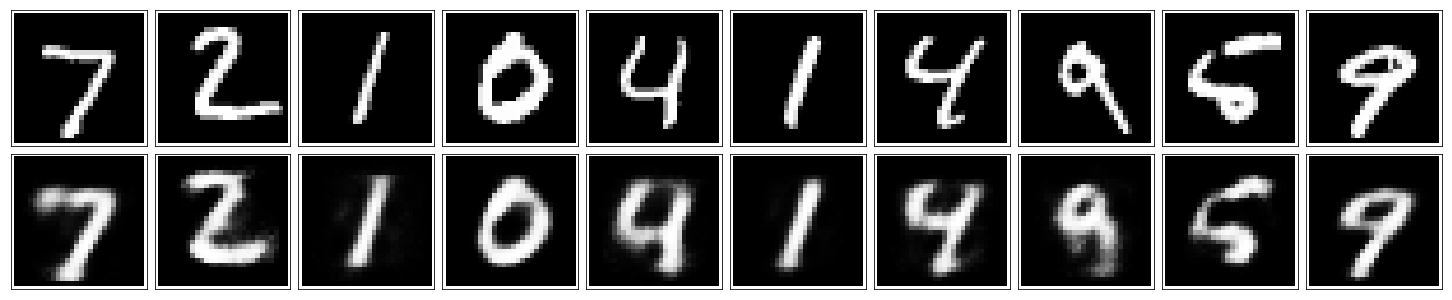

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [10]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.